In [2]:
import warnings
warnings.simplefilter("ignore")
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score, roc_curve, auc

In [2]:
train_id = pd.read_csv("train_identity.csv")
train_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [3]:
train_txn = pd.read_csv("train_transaction.csv")
train_txn.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [5]:
train_txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [6]:
test_id = pd.read_csv("test_identity.csv")
test_txn = pd.read_csv("train_transaction.csv")

In [7]:
test_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141907 entries, 0 to 141906
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  141907 non-null  int64  
 1   id-01          141907 non-null  float64
 2   id-02          136976 non-null  float64
 3   id-03          66481 non-null   float64
 4   id-04          66481 non-null   float64
 5   id-05          134750 non-null  float64
 6   id-06          134750 non-null  float64
 7   id-07          5059 non-null    float64
 8   id-08          5059 non-null    float64
 9   id-09          74338 non-null   float64
 10  id-10          74338 non-null   float64
 11  id-11          136778 non-null  float64
 12  id-12          141907 non-null  object 
 13  id-13          130286 non-null  float64
 14  id-14          71357 non-null   float64
 15  id-15          136977 non-null  object 
 16  id-16          125747 non-null  object 
 17  id-17          135966 non-nul

In [8]:
test_txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [9]:
train = train_txn.merge(train_id, how='left', on="TransactionID")
test = test_txn.merge(test_id, how='left', on="TransactionID")

In [10]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [14]:
# find out missing values
train.isna().sum()/len(train) * 100

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
id_36             76.126088
id_37             76.126088
id_38             76.126088
DeviceType        76.155722
DeviceInfo        79.905510
Length: 434, dtype: float64

In [15]:
# drop columns if missing values greater than 60%
for i in train.columns:
    if (train[i].isnull().sum() / len(train) * 100) > 60:
        train.drop(i, inplace = True, axis = 1)

In [16]:
# filling 0 into na
for i in train.columns:
    train[i] = train[i].fillna(train[i].mode()[0])

In [17]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,321.0,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,...,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,361.926886,153.186458,199.471611,291.653527,86.822813,...,39.173114,21.305592,43.226087,26.749372,109.816313,247.601710,162.150103,18.372102,42.072278,28.326009
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,156.677363,11.322604,41.157610,95.949345,2.537300,...,172.126681,95.804974,173.443984,116.734202,2270.010192,3980.002546,2793.315350,332.301482,473.494534,382.049311
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,215.000000,150.000000,166.000000,205.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,360.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,327.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55125.000000,4817.470215,7519.870117,4817.470215,93736.000000,134021.000000,98476.000000,104060.000000,104060.000000,104060.000000


In [19]:
train['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

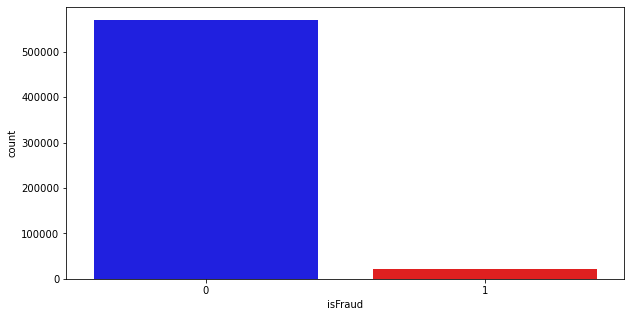

3.5 % of train_data tested as fraud
96.5 % of test_data tested as not fraud


In [20]:
# visualize the amount of fraud or not
plt.subplots(figsize=(10,5))
sns.countplot(train['isFraud'], palette=["blue", "red"])
plt.show()
print(np.round(train[train['isFraud']==1].shape[0]/train.shape[0]*100,2),'% of train_data tested as fraud')
print(np.round(train[train['isFraud']==0].shape[0]/train.shape[0]*100,2),'% of test_data tested as not fraud')

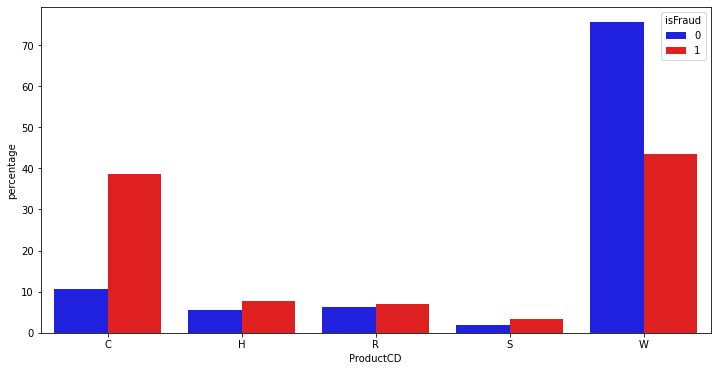

In [21]:
# visualize the fraud under ProductCD
plt.figure(figsize=(12,6))

train_ProductCD = (train.groupby(['isFraud'])['ProductCD']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('ProductCD'))
sns.barplot(x="ProductCD", y="percentage", hue="isFraud", data=train_ProductCD, palette=["blue", "red"]);

Text(0.5, 1.0, 'Train')

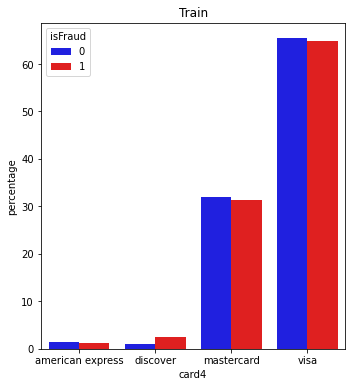

In [22]:
# visualize fraud under card4 
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
train_card4 = (train[~train['card4'].isnull()].groupby(['isFraud'])['card4']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('card4'))
sns.barplot(x="card4", y="percentage", hue="isFraud", data=train_card4, palette=["blue", "red"])
plt.title('Train')

In [23]:
# figure out the correlation 
cor = train.corr()
rel = cor['isFraud'].sort_values(ascending = False)
rel

isFraud    1.000000
V45        0.235436
V86        0.222343
V87        0.221568
V44        0.217870
             ...   
V91       -0.098592
V70       -0.099106
V69       -0.102396
V90       -0.102635
V29       -0.102738
Name: isFraud, Length: 213, dtype: float64

<AxesSubplot:>

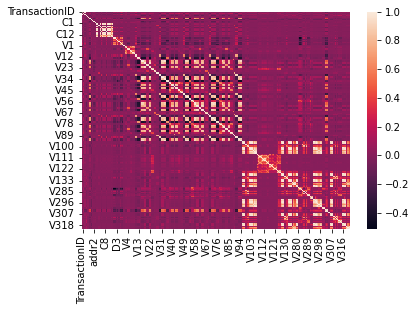

In [24]:
sns.heatmap(cor)

In [25]:
# select columns with relatively higher correlation
col = []
for i in range (len(rel)):
    if rel[i] > 0.1 or rel[i] < -0.1:
        col.append(rel.index[i])

In [26]:
# find out the object data_type
tsf = []
for i in train.columns:
    if train.dtypes[i] == 'O':
        tsf.append(i)

In [27]:
# convert category columns to int
la = LabelEncoder()
for i in tsf:
    train[i] = la.fit_transform(train[i])

In [28]:
x = train[col]
x.drop('isFraud', inplace = True, axis = 1)
x.head()

,V45,V86,V87,V44,V52,V51,V40,V79,V39,V38,...,V113,V283,V125,V24,V46,V112,V282,V69,V90,V29
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [29]:
y = train['isFraud']
y

0         0
1         0
2         0
3         0
4         0
         ..
590535    0
590536    0
590537    0
590538    0
590539    0
Name: isFraud, Length: 590540, dtype: int64

In [85]:
del train

In [30]:
# balancing
over = SMOTE()
x, y = over.fit_resample(x, y)
y.value_counts()

0    569877
1    569877
Name: isFraud, dtype: int64

In [31]:
x.describe()

,V45,V86,V87,V44,V52,V51,V40,V79,V39,V38,...,V113,V283,V125,V24,V46,V112,V282,V69,V90,V29
count,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,...,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06
mean,1.445238e+00,1.268998e+00,1.340960e+00,1.354863e+00,3.153604e-01,2.818703e-01,3.133648e-01,2.643818e-01,2.807271e-01,1.411435e+00,...,1.022761e+00,1.426049e+00,1.124116e+00,1.123403e+00,1.051519e+00,1.025172e+00,1.055536e+00,2.104527e-01,2.119444e-01,2.092720e-01
std,2.018577e+00,1.124875e+00,1.313676e+00,1.840106e+00,6.638527e-01,5.502348e-01,7.691050e-01,5.237763e-01,6.585949e-01,1.961663e+00,...,1.946629e-01,2.355858e+00,5.591940e-01,5.731388e-01,2.737680e-01,1.997001e-01,1.149408e+00,4.294742e-01,4.305751e-01,4.256653e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.800000e+01,3.000000e+01,3.000000e+01,4.800000e+01,1.200000e+01,6.000000e+00,2.400000e+01,7.000000e+00,1.500000e+01,5.400000e+01,...,9.000000e+00,6.800000e+01,1.300000e+01,1.300000e+01,6.000000e+00,9.000000e+00,3.200000e+01,5.000000e+00,5.000000e+00,5.000000e+00


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [33]:
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [34]:
predicted = rf.predict(x_train)
print("Accuracy using Random Forest is {} %".format(accuracy_score(predicted, y_train)*100))

Accuracy using Random Forest is 77.36539485151758 %


In [35]:
predicted = rf.predict(x_test)
print("Accuracy using Random Forest is {} %".format(accuracy_score(predicted, y_test)*100))

Accuracy using Random Forest is 77.11369801957612 %


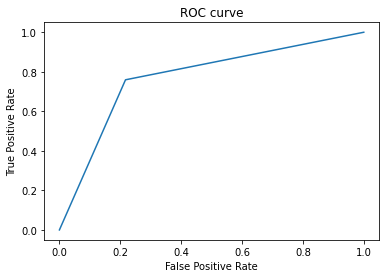

AUC value is 0.771142698694487 


In [36]:
fpr, tpr, threshold= roc_curve(y_test, predicted, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

In [37]:
x.shape

(1139754, 61)

In [38]:
test.shape

(590540, 434)

In [39]:
# checking missing values
for i in test.columns:
    if test[i].isnull().sum() / len(test) * 100 > 60:
        test.drop(i, inplace = True, axis = 1)

In [40]:
# fill 0 into na
for i in test.columns:
    test[i] = test[i].fillna(test[i].mode()[0])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 226 entries, TransactionID to V321
dtypes: float64(209), int64(4), object(13)
memory usage: 1022.7+ MB


In [41]:
# figure out object columns
o = []
for i in test.columns:
    if test.dtypes[i] == 'O':
        o.append(i)
o

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [42]:
# convert category to int
for i in o:
    test[i] = la.fit_transform(test[i])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 226 entries, TransactionID to V321
dtypes: float64(209), int64(17)
memory usage: 1022.7 MB


In [43]:
# remove y from correlated variables
col.remove('isFraud')
col

['V45',
 'V86',
 'V87',
 'V44',
 'V52',
 'V51',
 'V40',
 'V79',
 'V39',
 'V38',
 'V43',
 'V94',
 'V33',
 'V17',
 'V18',
 'V81',
 'V34',
 'V74',
 'V80',
 'V93',
 'V15',
 'V42',
 'V92',
 'card3',
 'V16',
 'V37',
 'V50',
 'V73',
 'V58',
 'V85',
 'V84',
 'V21',
 'V57',
 'V31',
 'V77',
 'V32',
 'V123',
 'V22',
 'V47',
 'V72',
 'V23',
 'V302',
 'V78',
 'V304',
 'V71',
 'V63',
 'V60',
 'V59',
 'V64',
 'V303',
 'V111',
 'V113',
 'V283',
 'V125',
 'V24',
 'V46',
 'V112',
 'V282',
 'V69',
 'V90',
 'V29']

In [44]:
x_test_pre = test[col]
predicted = rf.predict(x_test_pre)
x_test_pre.shape

(590540, 61)

In [45]:
# prediction result
result = pd.DataFrame( {'TransactionID':test['TransactionID'], 'isFraud':predicted})
result

,TransactionID,isFraud
0,2987000,0
1,2987001,0
2,2987002,0
3,2987003,0
4,2987004,1
...,...,...
590535,3577535,0
590536,3577536,0
590537,3577537,0
590538,3577538,0
